In [212]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
from nose.tools import *
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import ExtraTreesRegressor

from sklearn.compose import ColumnTransformer
from sklearn.impute import SimpleImputer
from sklearn.pipeline import Pipeline
from watson_machine_learning_client import WatsonMachineLearningAPIClient

In [213]:
# The code was removed by Watson Studio for sharing.

,Country,Year,Status,Life expectancy,Adult Mortality,infant deaths,Alcohol,percentage expenditure,Hepatitis B,Measles,...,Polio,Total expenditure,Diphtheria,HIV/AIDS,GDP,Population,thinness 1-19 years,thinness 5-9 years,Income composition of resources,Schooling
0,Afghanistan,2015,Developing,65.0,263.0,62,0.01,71.279624,65.0,1154,...,6.0,8.16,65.0,0.1,584.259210,33736494.0,17.2,17.3,0.479,10.1
1,Afghanistan,2014,Developing,59.9,271.0,64,0.01,73.523582,62.0,492,...,58.0,8.18,62.0,0.1,612.696514,327582.0,17.5,17.5,0.476,10.0
2,Afghanistan,2013,Developing,59.9,268.0,66,0.01,73.219243,64.0,430,...,62.0,8.13,64.0,0.1,631.744976,31731688.0,17.7,17.7,0.470,9.9
3,Afghanistan,2012,Developing,59.5,272.0,69,0.01,78.184215,67.0,2787,...,67.0,8.52,67.0,0.1,669.959000,3696958.0,17.9,18.0,0.463,9.8
4,Afghanistan,2011,Developing,59.2,275.0,71,0.01,7.097109,68.0,3013,...,68.0,7.87,68.0,0.1,63.537231,2978599.0,18.2,18.2,0.454,9.5


In [214]:
df.shape

(2938, 22)

In [215]:
df=df.rename(columns={'Life expectancy ':'Life expectancy','Measles ':'Measles',' BMI ':'BMI','Diphtheria ':'Diphtheria',' HIV/AIDS':'HIV/AIDS',' thinness  1-19 years':'thinness 1-19 years',' thinness 5-9 years':'thinness 5-9 years'})

In [216]:
df.columns

Index(['Country', 'Year', 'Status', 'Life expectancy', 'Adult Mortality',
       'infant deaths', 'Alcohol', 'percentage expenditure', 'Hepatitis B',
       'Measles', 'BMI', 'under-five deaths ', 'Polio', 'Total expenditure',
       'Diphtheria', 'HIV/AIDS', 'GDP', 'Population', 'thinness 1-19 years',
       'thinness 5-9 years', 'Income composition of resources', 'Schooling'],
      dtype='object')

In [217]:
df.isnull().sum()

Country                              0
Year                                 0
Status                               0
Life expectancy                     10
Adult Mortality                     10
infant deaths                        0
Alcohol                            194
percentage expenditure               0
Hepatitis B                        553
Measles                              0
BMI                                 34
under-five deaths                    0
Polio                               19
Total expenditure                  226
Diphtheria                          19
HIV/AIDS                             0
GDP                                448
Population                         652
thinness 1-19 years                 34
thinness 5-9 years                  34
Income composition of resources    167
Schooling                          163
dtype: int64

In [218]:
df=df.drop(['Year','Country'],axis=1)

In [219]:
x='Life expectancy'
y='Adult Mortality'
df[x].corr(df[y])

-0.6963593137699758

Text(0, 0.5, 'Life expectancy')

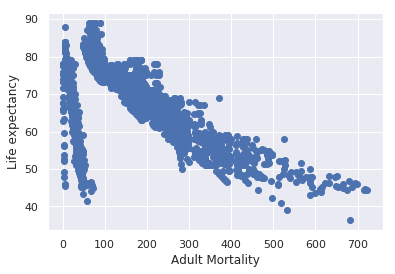

In [220]:
plt.scatter(df[y],df[x])
plt.xlabel(y)
plt.ylabel(x)

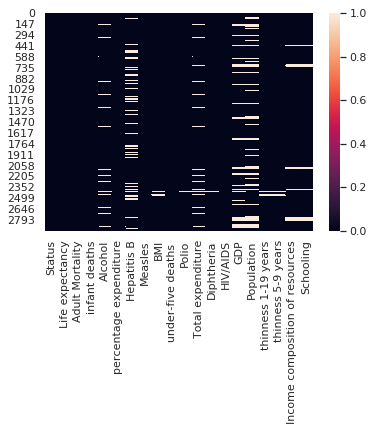

In [221]:
import seaborn as sns
sns.heatmap(pd.isnull(df))

In [222]:
df.select_dtypes(include=['int64', 'float64']).columns

Index(['Life expectancy', 'Adult Mortality', 'infant deaths', 'Alcohol',
       'percentage expenditure', 'Hepatitis B', 'Measles', 'BMI',
       'under-five deaths ', 'Polio', 'Total expenditure', 'Diphtheria',
       'HIV/AIDS', 'GDP', 'Population', 'thinness 1-19 years',
       'thinness 5-9 years', 'Income composition of resources', 'Schooling'],
      dtype='object')

In [223]:
df.select_dtypes(include=['object', 'bool']).columns

Index(['Status'], dtype='object')

In [224]:
df['Status'].fillna(df['Status'].mode(),inplace=True)
df['Status'].isnull().sum()

0

In [225]:
df.fillna(df.mean(),inplace=True)
df.isnull().sum()

Status                             0
Life expectancy                    0
Adult Mortality                    0
infant deaths                      0
Alcohol                            0
percentage expenditure             0
Hepatitis B                        0
Measles                            0
BMI                                0
under-five deaths                  0
Polio                              0
Total expenditure                  0
Diphtheria                         0
HIV/AIDS                           0
GDP                                0
Population                         0
thinness 1-19 years                0
thinness 5-9 years                 0
Income composition of resources    0
Schooling                          0
dtype: int64

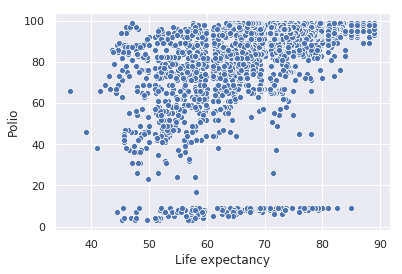

In [226]:
sns.scatterplot(x=df['Life expectancy'],y=df['Polio']);

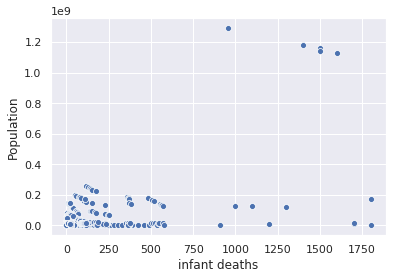

In [227]:
sns.scatterplot(x=df['infant deaths'],y=df['Population']);

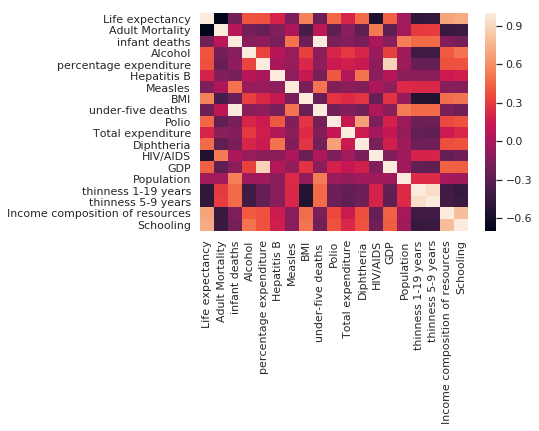

In [228]:
sns.heatmap(df.corr())

In [229]:
a=list(df.columns)
b=[]
for i in a:
    c=df[i].isnull().sum()
    b.append(c)
null_df=pd.DataFrame({'Feature name':a,'Nan':b})
null_df

,Feature name,Nan
0,Status,0
1,Life expectancy,0
2,Adult Mortality,0
3,infant deaths,0
4,Alcohol,0
5,percentage expenditure,0
6,Hepatitis B,0
7,Measles,0
8,BMI,0
9,under-five deaths,0


Text(0, 0.5, 'Life expectancy')

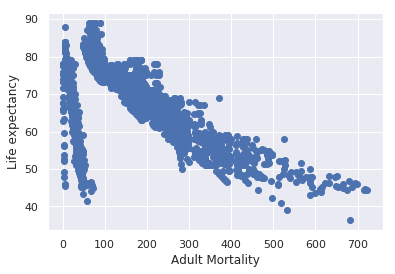

In [230]:
plt.scatter(df['Adult Mortality'], df['Life expectancy'])
plt.xlabel('Adult Mortality')
plt.ylabel('Life expectancy')

Text(0, 0.5, 'Life expectancy ')

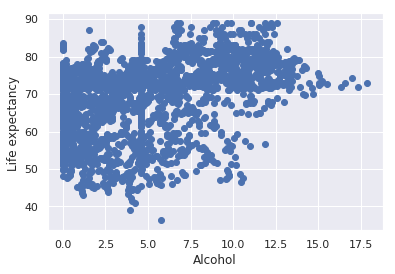

In [231]:
plt.scatter(df['Alcohol'], df['Life expectancy'])
plt.xlabel('Alcohol')
plt.ylabel('Life expectancy ')

Text(0, 0.5, 'Life expectancy ')

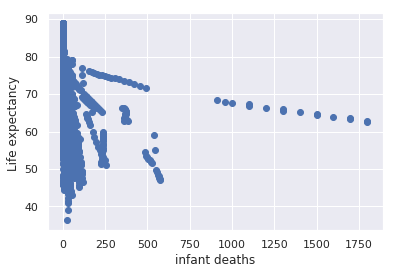

In [232]:
plt.scatter(df['infant deaths'], df['Life expectancy'])
plt.xlabel('infant deaths')
plt.ylabel('Life expectancy ')

Text(0, 0.5, 'Life expectancy')

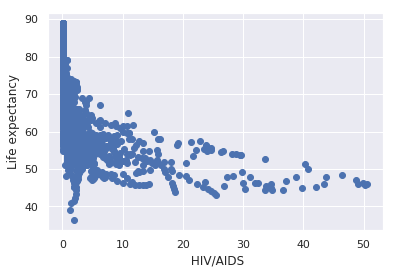

In [233]:
plt.scatter(df['HIV/AIDS'], df['Life expectancy'])
plt.xlabel(' HIV/AIDS')
plt.ylabel('Life expectancy')

Text(0, 0.5, 'Life expectancy')

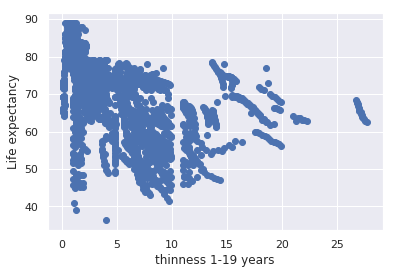

In [234]:
plt.scatter(df['thinness 1-19 years'], df['Life expectancy'])
plt.xlabel('thinness 1-19 years')
plt.ylabel('Life expectancy')

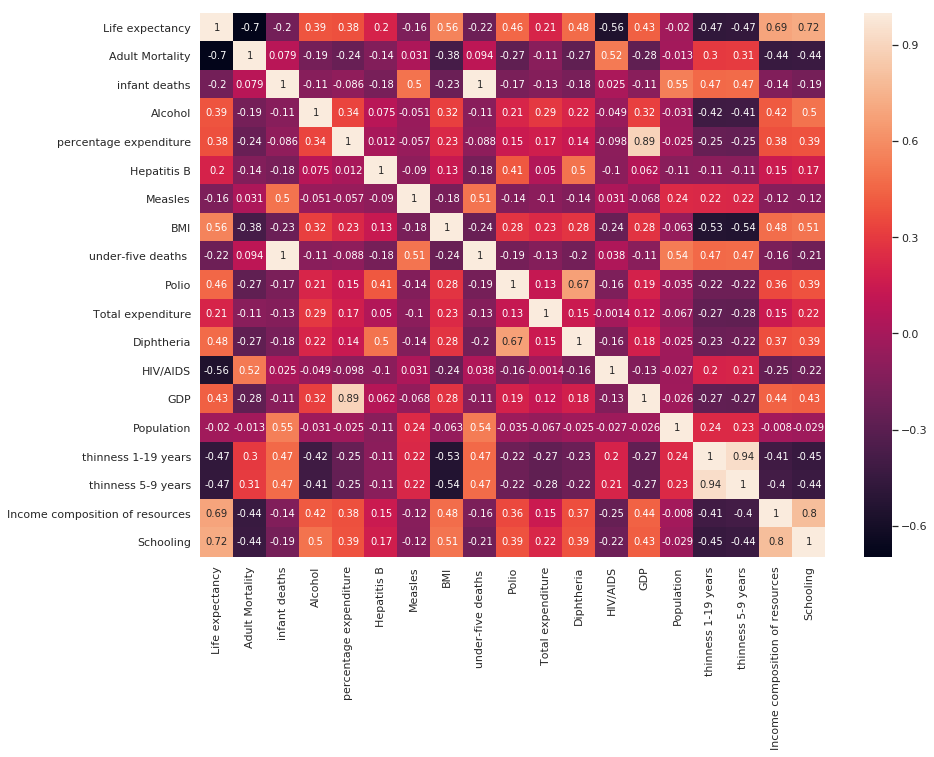

In [235]:
import seaborn as sns
plt.figure(figsize = (14, 10))
sns.heatmap(df.corr(),annot=True)

In [236]:
y=df['Life expectancy']
x=df[df.columns.difference(['Life expectancy'])]

In [237]:
x.columns.value_counts()

percentage expenditure             1
Income composition of resources    1
Polio                              1
Schooling                          1
thinness 5-9 years                 1
Population                         1
Alcohol                            1
HIV/AIDS                           1
Total expenditure                  1
Adult Mortality                    1
infant deaths                      1
GDP                                1
Measles                            1
Hepatitis B                        1
thinness 1-19 years                1
Diphtheria                         1
BMI                                1
under-five deaths                  1
Status                             1
dtype: int64

In [238]:
x['Status'].unique()

array(['Developing', 'Developed'], dtype=object)

In [239]:
x['Status'] = x['Status'].map({'Developing' : 0, 'Developed' : 1})

In [240]:
x['Status'].value_counts()

0    2426
1     512
Name: Status, dtype: int64

In [241]:
x.shape

(2938, 19)

In [242]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.20, random_state=101)
X_test.columns

Index(['Adult Mortality', 'Alcohol', 'BMI', 'Diphtheria', 'GDP', 'HIV/AIDS',
       'Hepatitis B', 'Income composition of resources', 'Measles', 'Polio',
       'Population', 'Schooling', 'Status', 'Total expenditure',
       'infant deaths', 'percentage expenditure', 'thinness 1-19 years',
       'thinness 5-9 years', 'under-five deaths '],
      dtype='object')

In [243]:
X_test.columns.value_counts()

percentage expenditure             1
Income composition of resources    1
Polio                              1
Schooling                          1
thinness 5-9 years                 1
Population                         1
Alcohol                            1
HIV/AIDS                           1
Total expenditure                  1
Adult Mortality                    1
infant deaths                      1
GDP                                1
Measles                            1
Hepatitis B                        1
thinness 1-19 years                1
Diphtheria                         1
BMI                                1
under-five deaths                  1
Status                             1
dtype: int64

In [244]:
from sklearn.ensemble import RandomForestRegressor
regressor = RandomForestRegressor(n_estimators = 200, random_state = 0)
regressor.fit(X_train, y_train)

RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
           max_features='auto', max_leaf_nodes=None,
           min_impurity_decrease=0.0, min_impurity_split=None,
           min_samples_leaf=1, min_samples_split=2,
           min_weight_fraction_leaf=0.0, n_estimators=200, n_jobs=None,
           oob_score=False, random_state=0, verbose=0, warm_start=False)

In [245]:
regressor.score(X_train,y_train)

0.9947379526738626

In [246]:

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.20, random_state=101)
X_test.columns


Index(['Adult Mortality', 'Alcohol', 'BMI', 'Diphtheria', 'GDP', 'HIV/AIDS',
       'Hepatitis B', 'Income composition of resources', 'Measles', 'Polio',
       'Population', 'Schooling', 'Status', 'Total expenditure',
       'infant deaths', 'percentage expenditure', 'thinness 1-19 years',
       'thinness 5-9 years', 'under-five deaths '],
      dtype='object')

In [247]:
regressor.score(X_test,y_test)

0.9635436455621981

In [248]:
y_pred = regressor.predict(X_test)
np.set_printoptions(precision=2)
y_pred = np.array(y_pred)
y_test = np.array(y_test)

print(np.concatenate((y_pred.reshape(len(y_test),1), y_test.reshape(len(y_test),1)),1))

[[63.16 62.5 ]
 [54.18 53.6 ]
 [83.2  83.3 ]
 ...
 [55.42 55.  ]
 [69.93 69.4 ]
 [74.8  75.  ]]


In [249]:
pred=regressor.predict(X_test)
pred

array([63.16, 54.18, 83.2 , 65.63, 73.73, 72.9 , 67.99, 81.97, 61.86,
       82.84, 64.24, 71.98, 74.63, 73.89, 50.92, 74.45, 68.12, 72.9 ,
       70.49, 78.27, 56.91, 55.65, 74.57, 72.02, 69.93, 53.2 , 71.38,
       72.6 , 67.27, 72.95, 53.87, 55.52, 74.5 , 74.41, 82.5 , 72.52,
       73.52, 63.34, 70.87, 57.09, 60.79, 80.36, 63.99, 72.17, 67.77,
       70.59, 72.98, 73.01, 73.26, 67.84, 75.17, 82.47, 53.2 , 81.42,
       60.44, 62.08, 81.89, 68.59, 74.35, 52.79, 68.2 , 66.32, 71.93,
       82.  , 72.3 , 63.47, 83.16, 74.57, 83.4 , 71.25, 71.23, 58.13,
       73.57, 67.48, 80.24, 48.48, 57.39, 57.24, 82.06, 52.51, 52.07,
       69.99, 59.02, 73.01, 73.89, 63.28, 81.38, 51.84, 81.75, 79.68,
       58.86, 67.61, 72.15, 53.57, 46.68, 73.41, 74.91, 74.76, 72.14,
       71.92, 63.81, 62.96, 82.67, 72.77, 73.17, 72.14, 73.62, 80.89,
       67.63, 82.62, 48.27, 82.59, 72.34, 75.37, 62.74, 72.46, 68.49,
       73.83, 74.82, 81.69, 74.14, 74.64, 67.12, 62.  , 79.44, 80.33,
       72.45, 72.83,

In [250]:
regressor.score(X_test, y_test)

0.9635436455621981

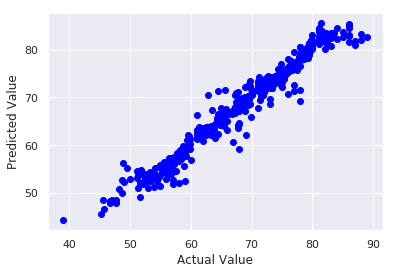

In [251]:
plt.scatter(y_test,pred,color="blue")
plt.xlabel('Actual Value')
plt.ylabel('Predicted Value')
plt.show()


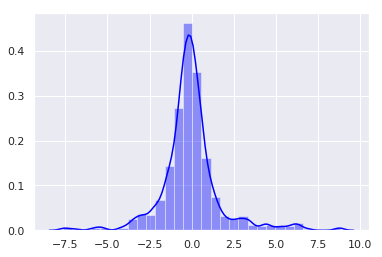

In [252]:
sns.set()
sns.distplot((y_test-pred),bins=30,color="blue")

In [253]:
from sklearn import metrics
print('MAE:', metrics.mean_absolute_error(y_test, pred))
print('MSE:', metrics.mean_squared_error(y_test, pred))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, pred)))

MAE: 1.1159513395180476
MSE: 3.151320077820447
RMSE: 1.7751957857713743


In [254]:
X_test.columns.value_counts()

percentage expenditure             1
Income composition of resources    1
Polio                              1
Schooling                          1
thinness 5-9 years                 1
Population                         1
Alcohol                            1
HIV/AIDS                           1
Total expenditure                  1
Adult Mortality                    1
infant deaths                      1
GDP                                1
Measles                            1
Hepatitis B                        1
thinness 1-19 years                1
Diphtheria                         1
BMI                                1
under-five deaths                  1
Status                             1
dtype: int64

In [275]:
wml={
 "apikey": "ZgMUvtjMkO1gBZD-EGen3ubhkYpsg82zpptxsvry6mC-",
  "iam_apikey_description": "Auto-generated for key d0fc8572-1df8-44d1-ba2c-db1205b2e15e",
  "iam_apikey_name": "wdp-writer",
  "iam_role_crn": "crn:v1:bluemix:public:iam::::serviceRole:Writer",
  "iam_serviceid_crn": "crn:v1:bluemix:public:iam-identity::a/9a8739c58bac44cab82b9eff3bc30987::serviceid:ServiceId-80652050-9839-4631-bc58-2add6adaba92",
  "instance_id": "319c10ad-eb3a-4ab3-adca-17258ea53684",
  "url": "https://us-south.ml.cloud.ibm.com"
}



In [276]:
client=WatsonMachineLearningAPIClient(wml)

In [277]:
model_props = {client.repository.ModelMetaNames.AUTHOR_NAME: "Shivam Kumar", 
               client.repository.ModelMetaNames.AUTHOR_EMAIL: "shivamkumar70620@gmail.com", 
               client.repository.ModelMetaNames.NAME: "Predicting Life Expectancy using python"}


In [278]:
model_artifact=client.repository.store_model(regressor, meta_props=model_props)

In [279]:
model_artifact

{'metadata': {'guid': '1f7d149c-3ecc-4a18-864e-e6f9468cc3ed',
  'url': 'https://us-south.ml.cloud.ibm.com/v3/wml_instances/319c10ad-eb3a-4ab3-adca-17258ea53684/published_models/1f7d149c-3ecc-4a18-864e-e6f9468cc3ed',
  'created_at': '2020-07-01T07:54:29.734Z',
  'modified_at': '2020-07-01T07:54:29.811Z'},
 'entity': {'runtime_environment': 'python-3.6',
  'learning_configuration_url': 'https://us-south.ml.cloud.ibm.com/v3/wml_instances/319c10ad-eb3a-4ab3-adca-17258ea53684/published_models/1f7d149c-3ecc-4a18-864e-e6f9468cc3ed/learning_configuration',
  'author': {'name': 'Shivam Kumar'},
  'name': 'Predicting Life Expectancy using python',
  'learning_iterations_url': 'https://us-south.ml.cloud.ibm.com/v3/wml_instances/319c10ad-eb3a-4ab3-adca-17258ea53684/published_models/1f7d149c-3ecc-4a18-864e-e6f9468cc3ed/learning_iterations',
  'feedback_url': 'https://us-south.ml.cloud.ibm.com/v3/wml_instances/319c10ad-eb3a-4ab3-adca-17258ea53684/published_models/1f7d149c-3ecc-4a18-864e-e6f9468cc3ed

In [280]:
model_uid = client.repository.get_model_uid(model_artifact)
model_uid


'1f7d149c-3ecc-4a18-864e-e6f9468cc3ed'

In [281]:
deploy = client.deployments.create(model_uid, name="Life_Expectancy_Prediction")



#######################################################################################

Synchronous deployment creation for uid: '1f7d149c-3ecc-4a18-864e-e6f9468cc3ed' started

#######################################################################################


INITIALIZING
DEPLOY_SUCCESS


------------------------------------------------------------------------------------------------
Successfully finished deployment creation, deployment_uid='9780afb5-7067-4eba-bc9a-ef70f2f7ab95'
------------------------------------------------------------------------------------------------




In [282]:
scoring_url = client.deployments.get_scoring_url(deploy)
print(scoring_url)

https://us-south.ml.cloud.ibm.com/v3/wml_instances/319c10ad-eb3a-4ab3-adca-17258ea53684/deployments/9780afb5-7067-4eba-bc9a-ef70f2f7ab95/online
